# Healthcare Cost Analysis Report

This report provides a comprehensive analysis of healthcare costs across various providers and states in the United States. The analysis focuses on understanding cost distributions, identifying patterns, and drawing insights from the data.


## Data Overview

The information, for this study came from a database of healthcare costs. The data was carefully prepared by cleaning and processing it to guarantee accuracy and uniformity. This involved deleting columns addressing missing data and converting data into the formats.

### Columns in the dataset:
- **DRG Definition**: Diagnosis-Related Group classification
- **Provider Id**: Unique identifier for the healthcare provider
- **Provider Name**: Name of the healthcare provider
- **Provider Street Address**: Street address of the healthcare provider
- **Provider City**: City where the healthcare provider is located
- **Provider State**: State where the healthcare provider is located
- **Provider Zip Code**: ZIP code of the healthcare provider
- **Hospital Referral Region Description**: Description of the hospital referral region
- **Total Discharges**: Total number of discharges
- **Average Covered Charges**: Average charges covered by insurance
- **Average Total Payments**: Average total payments made
- **Average Medicare Payments**: Average payments made by Medicare


In [14]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('../data/healthcare_cost_cleaned.csv')

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8   Total Discharges                      163065 non-null  int64  
 9   Average Covered Charges               163065 non-null  float64
 10  Average Total Payments                163065 non-null  float64
 11  

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


## Summary Statistics

Here is a summary of the data, in the dataset showing information about central trends and variations. This overview assists, in grasping the scope, average and variability of the data values.


In [15]:
# Display summary statistics
df.describe()


,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


## Data Cleaning

Ensuring the accuracy of the analysis is vital. One way to achieve this is, through data cleaning. This process includes eliminating any missing values and converting currency fields into values, for calculations.




In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

# Convert currency fields to numeric
for column in ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']:
    df[column] = df[column].replace('[\\$,]', '', regex=True).astype(float)

df.dtypes


DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
Total Discharges                          int64
Average Covered Charges                 float64
Average Total Payments                  float64
Average Medicare Payments               float64
dtype: object

### Interpretation:
 - The dataset is fully populated with no gaps ensuring that the analysis is comprehensive.
 - We have successfully transformed the currency columns into values enabling calculations and analysis.


## Exploratory Data Analysis

Lets dive into analyzing the distribution of variables and creating representations of the data to reveal patterns and valuable insights.


### Distribution of Total Discharges

The bar graph depicted below illustrates how the total discharges are spread out using a scale making it easier to interpret the data because of the range of values.


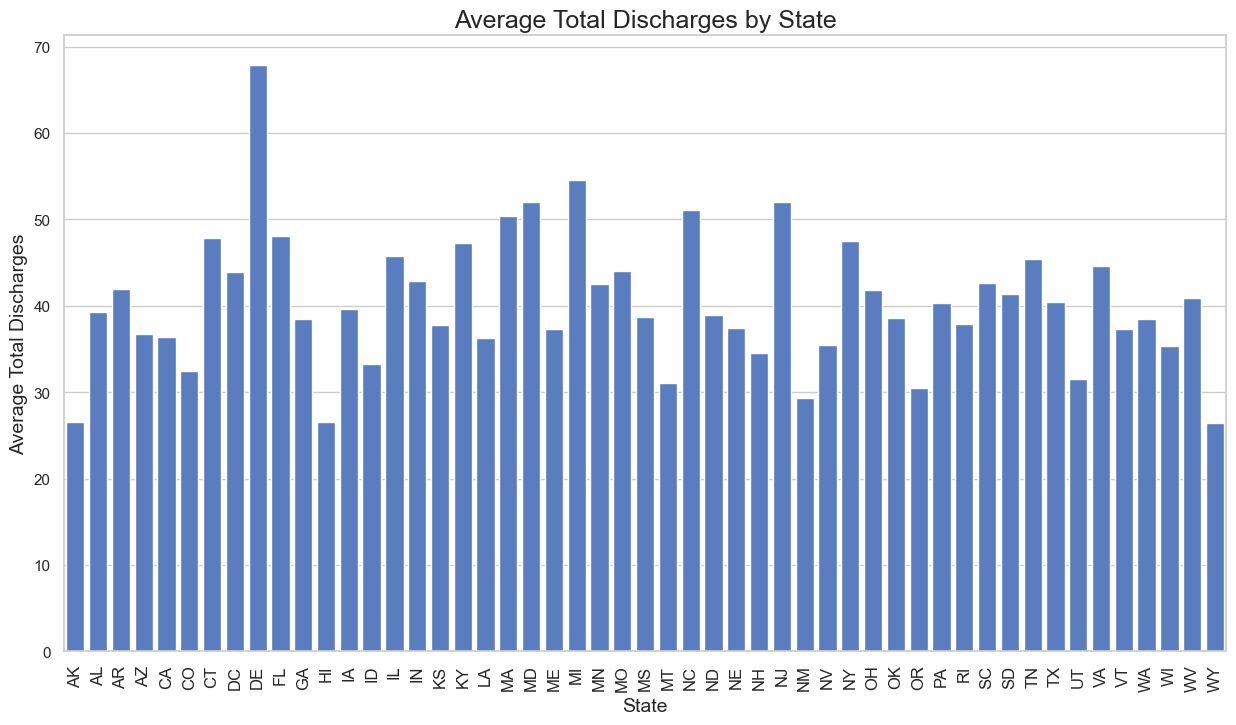

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

state_avg_discharges = df.groupby('Provider State')['Total Discharges'].mean().sort_index()
sns.barplot(x=state_avg_discharges.index, y=state_avg_discharges.values)
plt.title('Average Total Discharges by State', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Total Discharges', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()




### Average Total Payments and Average Medicare Payments by DRG


This chart shows a comparison, between the payments made by insurance companies and the average Medicare payments for the common Diagnosis Related Groups (DRGs) based on total discharges. The bar graph displays the payments while the line graph shows the average Medicare payments. This visual representation presents an overview of how insurance payments differ from Medicare payments, for these performed medical procedures.


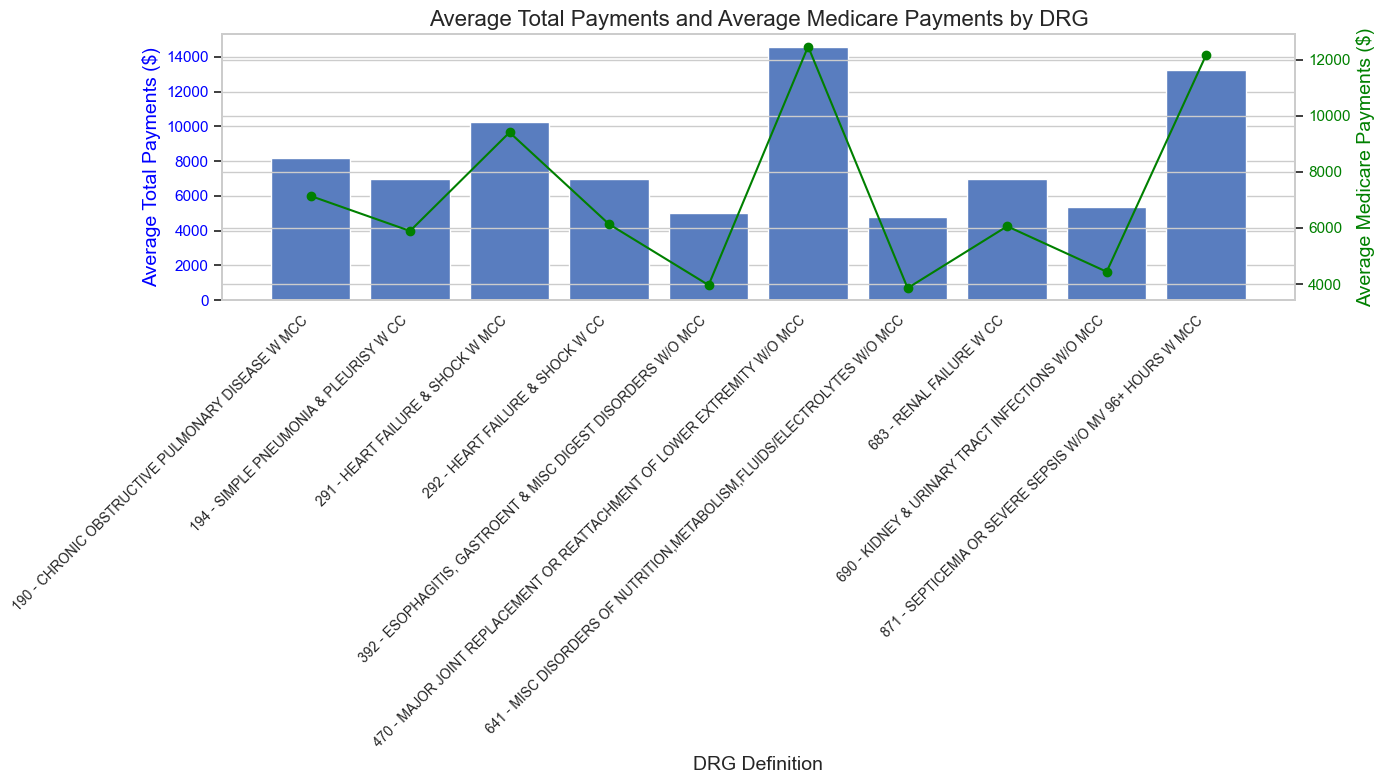

In [52]:
# Load the cleaned dataset
df = pd.read_csv('../data/healthcare_cost_cleaned.csv')

# Updated Visualization: Average Total Payments and Average Medicare Payments by DRG
# Select top 10 DRGs by total discharges
top_n_drg = df.groupby('DRG Definition')['Total Discharges'].sum().nlargest(10).index

# Filter the dataset to include only the top 10 DRGs
df_top_drg = df[df['DRG Definition'].isin(top_n_drg)]

# Calculate average total payments and average Medicare payments for each DRG
drg_summary = df_top_drg.groupby('DRG Definition').agg({
    'Average Total Payments': 'mean',
    'Average Medicare Payments': 'mean'
})

# Create a dual bar and line plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Average Total Payments
sns.barplot(x=drg_summary.index, y=drg_summary['Average Total Payments'], ax=ax1)
ax1.set_xlabel('DRG Definition', fontsize=14)
ax1.set_ylabel('Average Total Payments ($)', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(drg_summary.index)))  # Ensure the correct number of ticks
ax1.set_xticklabels(drg_summary.index, rotation=45, ha='right', fontsize=10)

# Line plot for Average Medicare Payments
ax2 = ax1.twinx()
ax2.plot(drg_summary.index, drg_summary['Average Medicare Payments'], color='green', marker='o')
ax2.set_ylabel('Average Medicare Payments ($)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Average Total Payments and Average Medicare Payments by DRG', fontsize=16)
plt.tight_layout()
plt.show()

### Average Covered Charges by State

The chart displayed below illustrates how average covered charges vary across states offering a glimpse into the range of costs, throughout the United States.


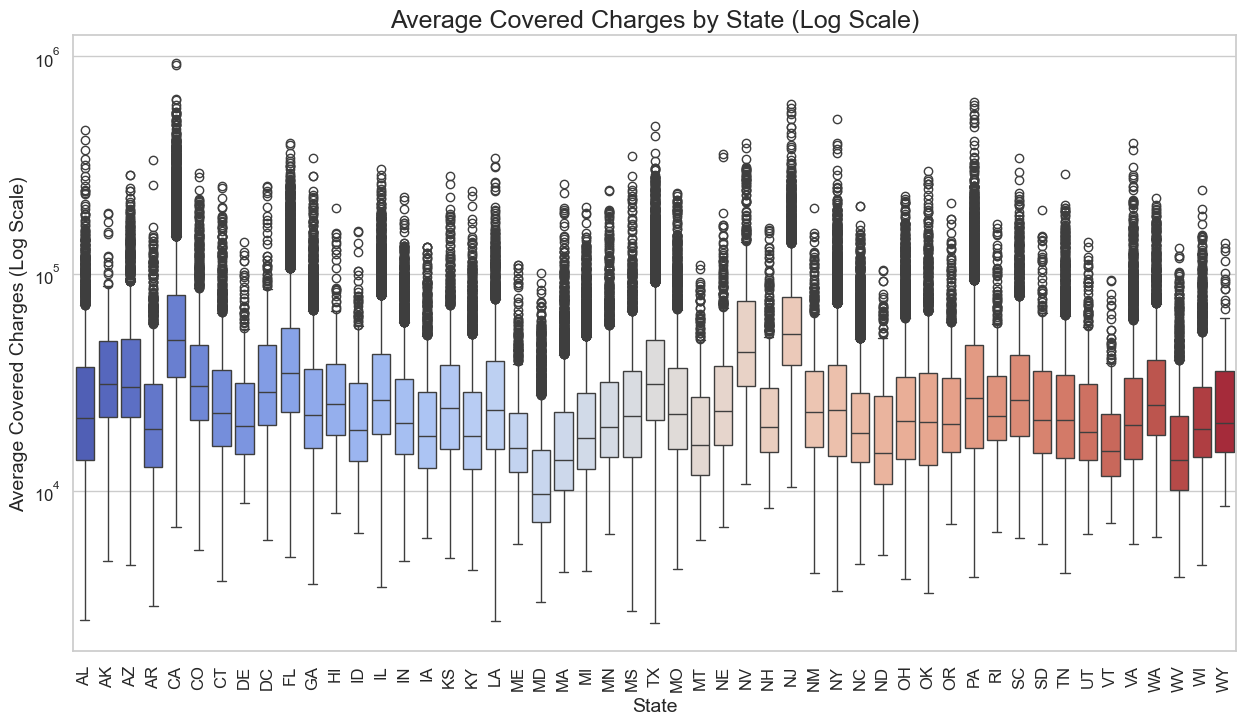

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x='Provider State', y='Average Covered Charges', data=df, palette='coolwarm', hue='Provider State')
plt.yscale('log')
plt.title('Average Covered Charges by State (Log Scale)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Covered Charges (Log Scale)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend([], [], frameon=False)  # Removes the legend
plt.show()

### Discharges vs Payments by Zip Code

This graph shows how the total number of discharges and the average total payments are related with each dot, on the graph standing for a zip code. The color of the dots represents zip codes and the size of the dots shows how discharges there are. This visual representation helps us see if where you live affects how much you get reimbursed for discharges.



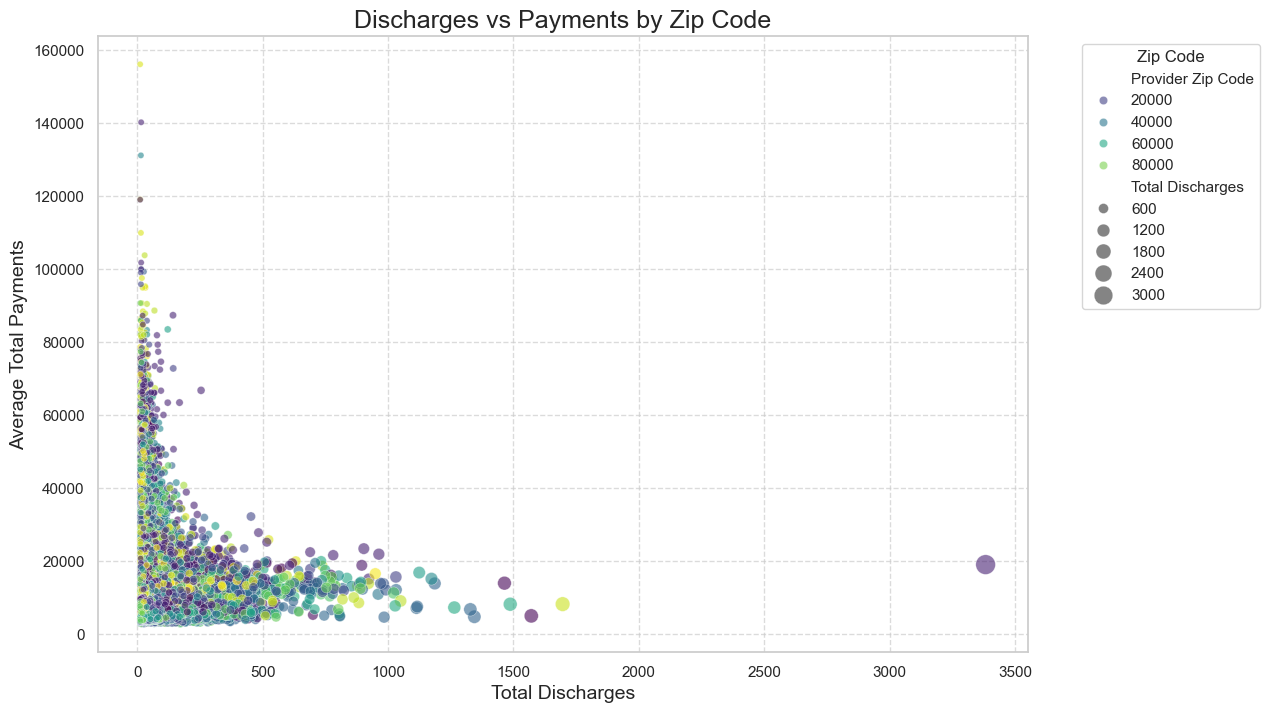

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Discharges', y='Average Total Payments', 
                size='Total Discharges', hue='Provider Zip Code', 
                palette='viridis', sizes=(20, 200), data=df, alpha=0.6)

plt.title('Discharges vs Payments by Zip Code', fontsize=18)
plt.xlabel('Total Discharges', fontsize=14)
plt.ylabel('Average Total Payments', fontsize=14)
plt.legend(title='Zip Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



### Interpretation:
- The scatter plot shows that the relationship, between Total Discharges and Average Total Payments differs depending on the zip code hinting at an impact of location on reimbursement rates. 
- The varying sizes of the points reflecting discharge numbers highlight disparities across zip codes. Some, with discharges but low payments while others have discharges but higher payments. This suggests that local factors could greatly influence the results of discharges.

## Conclusion

This study shows differences, in healthcare expenses, among states. The charts and data offer information that can assist policymakers, healthcare professionals and individuals in comprehending and tackling these cost differences.
